In [1]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

/vol/bitbucket/fms119/miniconda3/envs/modern_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

from zijing_main import *

def get_fid(file_path):
    data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                           'samples/cirfar10_true_10000.npz')
    data_samples = data['images'].transpose(0,3,1,2)
    data_samples = np.interp(data_samples, (data_samples.min(), data_samples.max()), (0, 1))

    data = np.load(file_path)
    # if images.shape[1]==3:
    #     images = images.transpose(0,2,3,1)
    print(data['images'].shape)
    gen_samples = data['images']
    gen_samples = np.interp(gen_samples, (gen_samples.min(), gen_samples.max()), (0, 1))

    fid = compute_fid_nchw(data_samples, gen_samples)
    return fid

# fid_trails = np.zeros((len(sizes),5))

# for i, n in enumerate(sizes):
#     for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
#         print(f'{i} out of {len(sizes)}')
#         file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
#         fid = get_fid(file_path)
#         print(fid)
#         fid_trails[i, j] = fid

# np.savez('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz', fid_trails=fid_trails)

2023-07-26 13:39:51.649785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

(4, 3, 32, 32)
(4, 32, 32, 3)
1.0
0.0


IndexError: index 4 is out of bounds for axis 0 with size 4

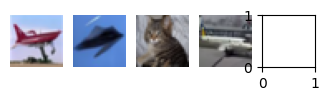

In [5]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_2000.npz')
images = data['x']
data = np.load(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{15000}{trial}.npz')
images = data['images']

print(images.shape)

# Number of rows/columns in the grid
grid_size = 10

# Create a new figure
plt.figure(figsize=(8,8))

if images.shape[1]==3:
    images = images.transpose(0,2,3,1)

images  = np.interp(images, (images.min(), images.max()), (0, 1))

print(images.shape)
print(images.max())
print(images.min())

# Loop over the images
for i in range(grid_size * grid_size):
    # Create a subplot for each image
    plt.subplot(grid_size, grid_size, i+1)
    # Display the image
    random_image = np.random.randint(0, images.shape[0])
    plt.imshow(images[i])
    # Remove the axes
    plt.axis('off')

# Show the figure
plt.show()

In [ ]:
fid_trails = np.zeros((len(sizes),5))

for i, n in enumerate(sizes):
    for j, trial in enumerate(['a', 'b', 'c', 'd', 'e']):
        print(f'{i} out of {len(sizes)}')
        file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/cirfar10_true_{n}{trial}.npz'
        fid = get_fid(file_path)
        print(fid)
        fid_trails[i, j] = fid

In [3]:
sizes = [500,  2000,  4000,  6000,  8000, 10001, 15000,  1000, 12500, 20000]

fid_trails_data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cifar10_true_trials/trial_fids.npz')
fid_trails = fid_trails_data['fid_trails']

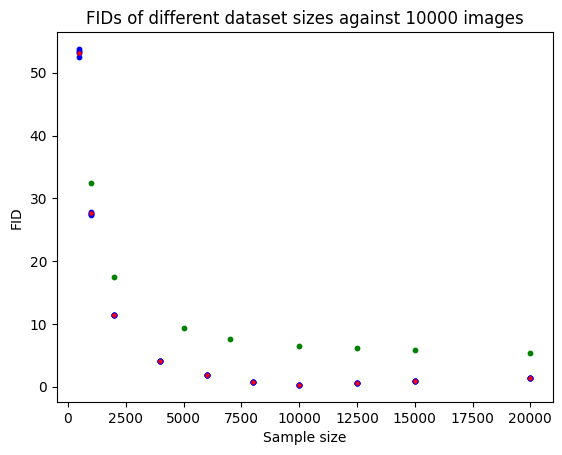

In [22]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=10, c='b')
plt.scatter(sizes, fid_trails.mean(axis=1), s=5, c='r')
plt.scatter(
    [10000, 1000, 5000, 7000, 2000, 20000, 15000, 12500], 
    [6.53987, 32.508, 9.37150, 7.5986, 17.4984, 5.33, 5.763, 6.07865], 
    s=10, c='g')
# plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

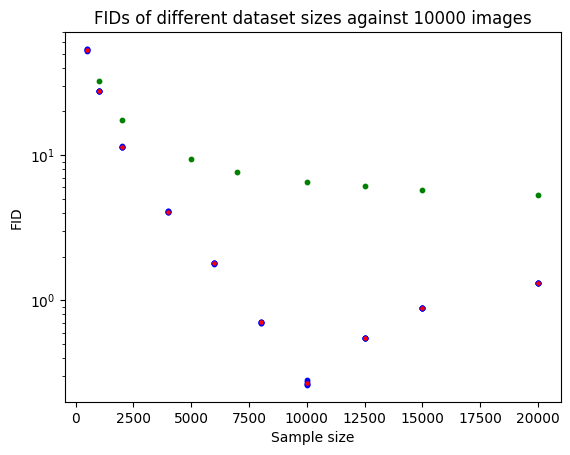

In [21]:
plt.scatter(sizes*5, fid_trails[:].T.reshape(-1), s=10, c='b')
plt.scatter(sizes, fid_trails.mean(axis=1), s=5, c='r')
plt.scatter(
    [10000, 1000, 5000, 7000, 2000, 20000, 15000, 12500], 
    [6.53987, 32.508, 9.37150, 7.5986, 17.4984, 5.33, 5.763, 6.07865], 
    s=10, c='g')
plt.yscale('log')
plt.title('FIDs of different dataset sizes against 10000 images')
plt.ylabel('FID')
plt.xlabel('Sample size')
plt.show()

Would be interesting to show that the FID is biased and this is why we see it increasing after 10 000 samples.

Took 35 minutes to run FID calculation for 20 000 images.


In [19]:
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_15000.npz'
fid = get_fid(file_path)
print(fid)

(15000, 3, 32, 32)
TAKING SHORTCUT
5.7627873616524425


In [20]:
file_path = f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_12500.npz'
fid = get_fid(file_path)
print(fid)

(12500, 3, 32, 32)
TAKING SHORTCUT


6.078650692351232


In [6]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_5000.npz')
images_a = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_5000_a.npz')
images_b = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_10000_a.npz')
images_c = data['images']

In [18]:
augmented_generation = np.concatenate((images_a, images_b, images_c))[:12500]
np.savez(f'/vol/bitbucket/fms119/score_sde_pytorch/samples/synthetic_all_samples_12500.npz', images=augmented_generation)

In [10]:
augmented_generation.shape

(20000, 3, 32, 32)